In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

### 1.Data Cleaning

In [4]:
# clean the train dataset 
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
data = pd.read_csv('C:/Users/yjy99/Downloads/AIA Data Science test[14]/AIA Innovation Team Data Science Problem/dataset/adult.data', header = None, names = columns)

In [6]:
data.head(10)

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
# check the detail of the data for classification consideration later 
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
# clean the test dataset 
test = pd.read_csv('C:/Users/yjy99/Downloads/AIA Data Science test[14]/AIA Innovation Team Data Science Problem/dataset/adult.test', header = None, skiprows = [0], names = columns,delimiter = ',')
test.head(80)

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,17,?,165361,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K.
76,41,Private,75012,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,<=50K.
77,69,Self-emp-inc,174379,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,30,United-States,<=50K.
78,50,Private,312477,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K.


In [9]:
# check if the "Income" column is consistent in the train and test dataset, and inspect there is an extra dot in the test dataset 
test['Income'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [10]:
# clean the "Income" column in both train and test dataset to make it consistent
test['Income'].replace(' <=50K.',' <=50K',inplace = True)
test['Income'].replace(' >50K.',' >50K',inplace = True)
test['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
# combine the train and test dataset to make data cleaning more efficiently,
# after cleaning will use model_selection to seperate train and test dataset accordingly 
data = data.append(test)

C:\Users\yjy99\AppData\Local\Temp\ipykernel_25296\2629532823.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(test)


In [14]:
# check if two datasets appended correctly 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65123 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               65123 non-null  int64 
 1   Work Class        65123 non-null  object
 2   Final Weight      65123 non-null  int64 
 3   Education         65123 non-null  object
 4   Education Number  65123 non-null  int64 
 5   Marital Status    65123 non-null  object
 6   Occupation        65123 non-null  object
 7   Relationship      65123 non-null  object
 8   Race              65123 non-null  object
 9   Sex               65123 non-null  object
 10  Capital Gain      65123 non-null  int64 
 11  Capital Loss      65123 non-null  int64 
 12  Hours per Week    65123 non-null  int64 
 13  Country           65123 non-null  object
 14  Income            65123 non-null  object
dtypes: int64(6), object(9)
memory usage: 7.9+ MB


In [15]:
# to numerize the "Income" column, to make it more fit for analyzing 
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['Income'] = labelEncoder.fit_transform(data['Income'])

### 2.Data exploring 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Final Weight'}>],
       [<AxesSubplot:title={'center':'Education Number'}>,
        <AxesSubplot:title={'center':'Capital Gain'}>],
       [<AxesSubplot:title={'center':'Capital Loss'}>,
        <AxesSubplot:title={'center':'Hours per Week'}>]], dtype=object)

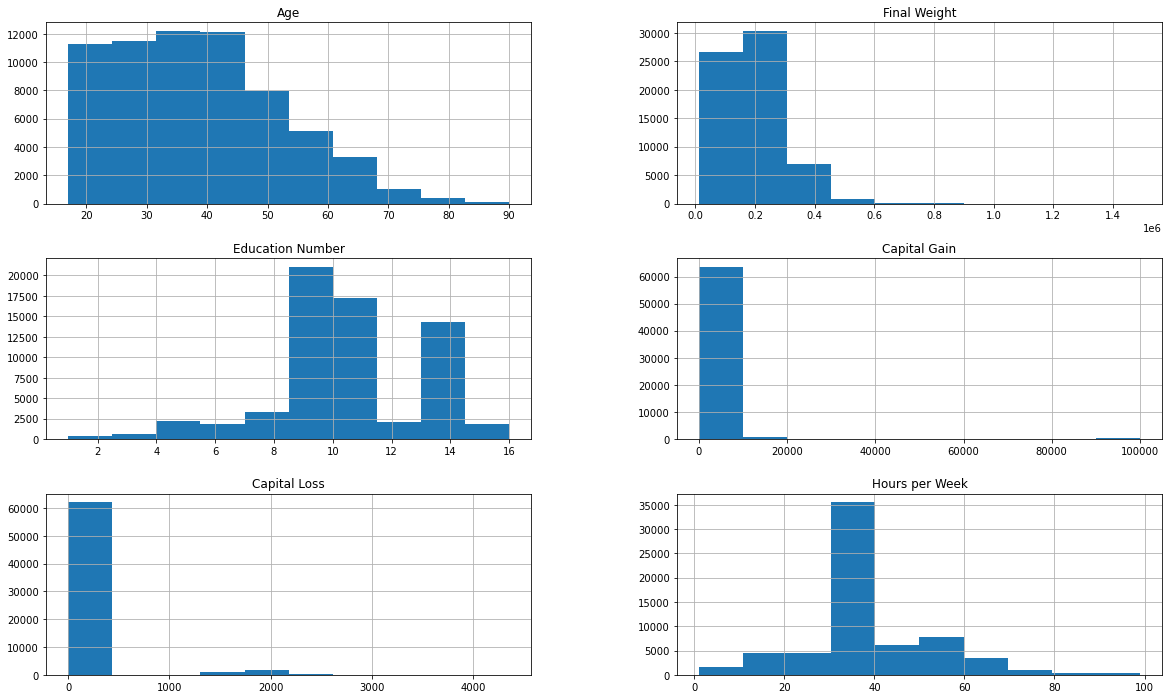

In [16]:
# to see feature data distribution more strainght-froward to better categorize it later 
rcParams['figure.figsize'] = 20, 12
data[['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']].hist()

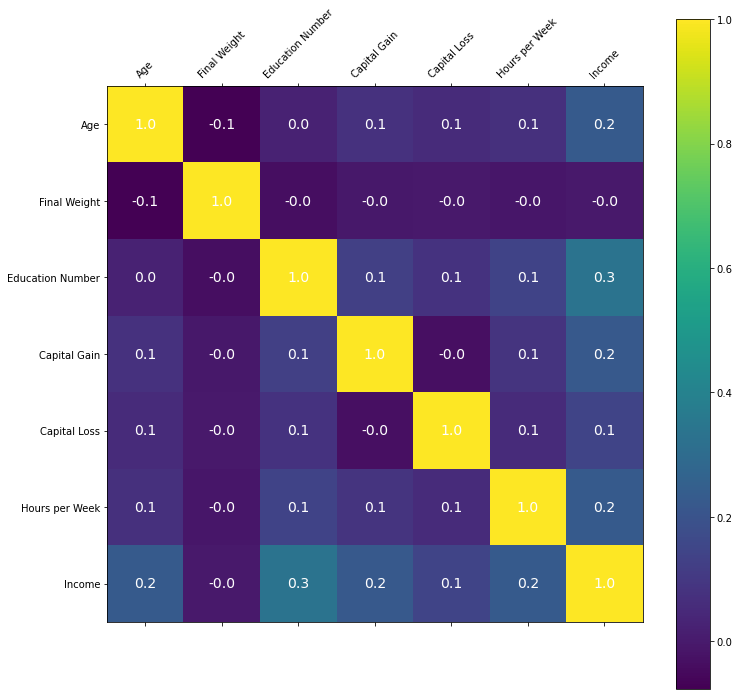

In [17]:
# check the correlation between feature data and target data 
plt.matshow(data.corr())
plt.colorbar()
plt.xticks(np.arange(len(data.corr().columns)), data.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(data.corr().columns)), data.corr().columns.values) 
for (i, j), corr in np.ndenumerate(data.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

<AxesSubplot:xlabel='Age', ylabel='count'>

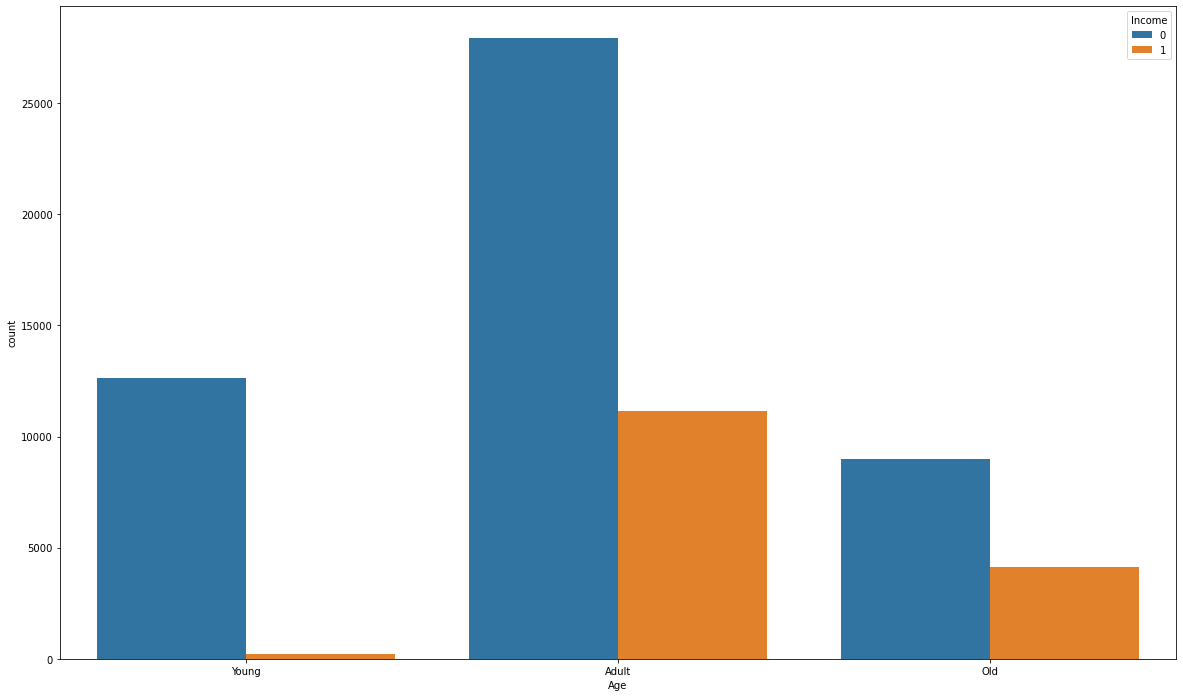

In [18]:
#In order to make the relationship between feature data and target data  more obvious, to categorize feature data into bins 
data['Age'] = pd.cut(data['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])
sns.countplot(x = 'Age', hue = 'Income', data = data)

<AxesSubplot:xlabel='Capital Diff', ylabel='count'>

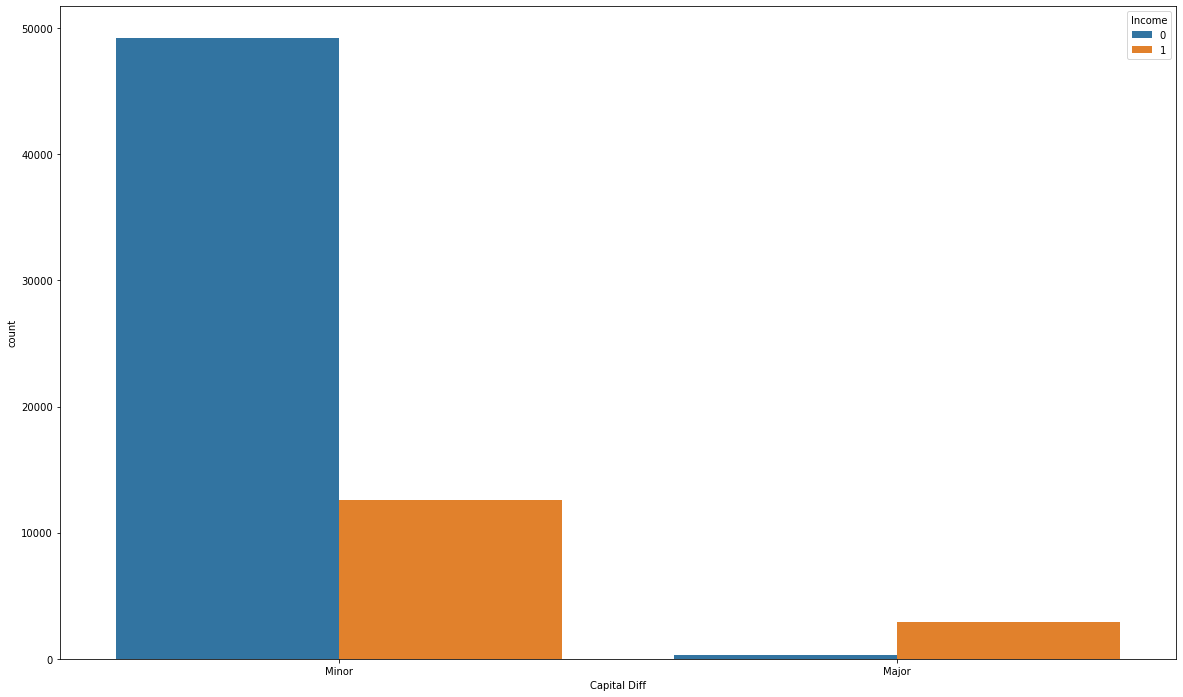

In [19]:
#for the aspect of investment, generate a feature data as absolute gain to seek more appropriate correlation 
data.drop(['Capital Gain'], axis = 1, inplace = True)
data.drop(['Capital Loss'], axis = 1, inplace = True)
data['Capital Diff'] = pd.cut(data['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Capital Diff', hue = 'Income', data = data)

In [20]:
# drop the feature data which bears no correlation with target data
data.drop(['Final Weight'], axis = 1, inplace = True)

<AxesSubplot:xlabel='Hours per Week', ylabel='count'>

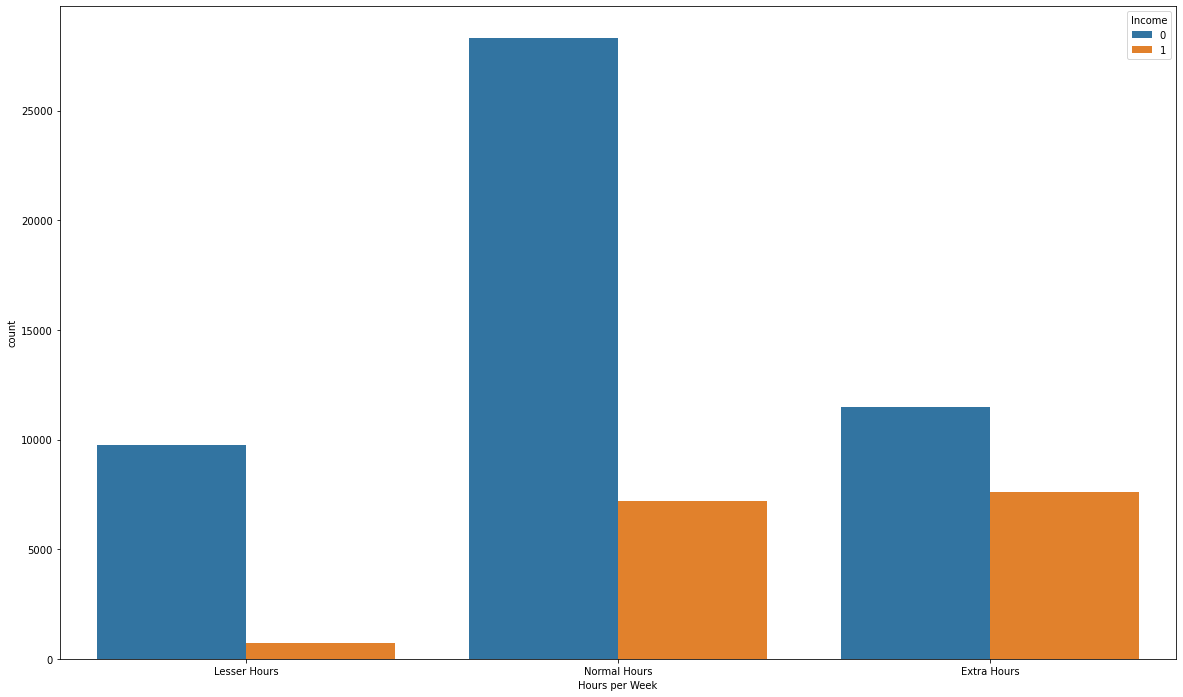

In [21]:
# categorize working hours 
data['Hours per Week'] = pd.cut(data['Hours per Week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])
sns.countplot(x = 'Hours per Week', hue = 'Income', data = data)

<AxesSubplot:xlabel='Work Class', ylabel='count'>

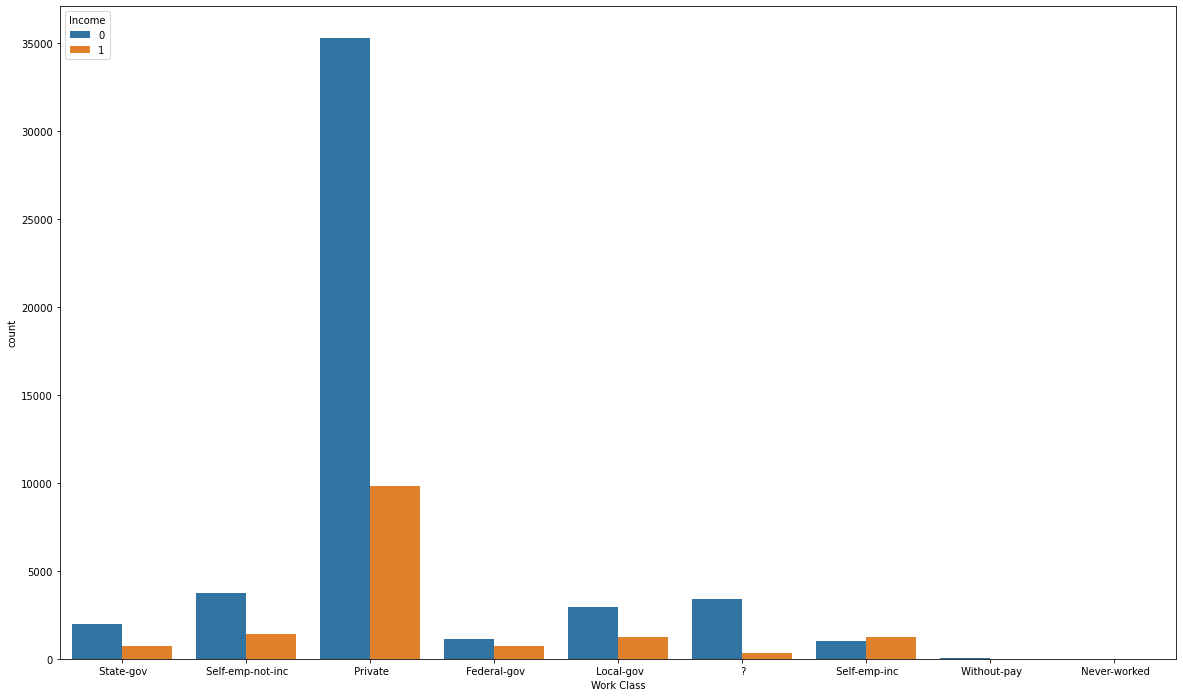

In [22]:
sns.countplot(x = 'Work Class', hue = 'Income', data = data)

In [23]:
# drop data that doesn't fit for the analyzing purpose 
data = data.drop(data[data['Work Class'] == ' ?'].index)
data = data.drop(data[data['Work Class'] == ' Without-pay'].index)
data = data.drop(data[data['Work Class'] == ' Never-worked'].index)

<AxesSubplot:xlabel='Education', ylabel='count'>

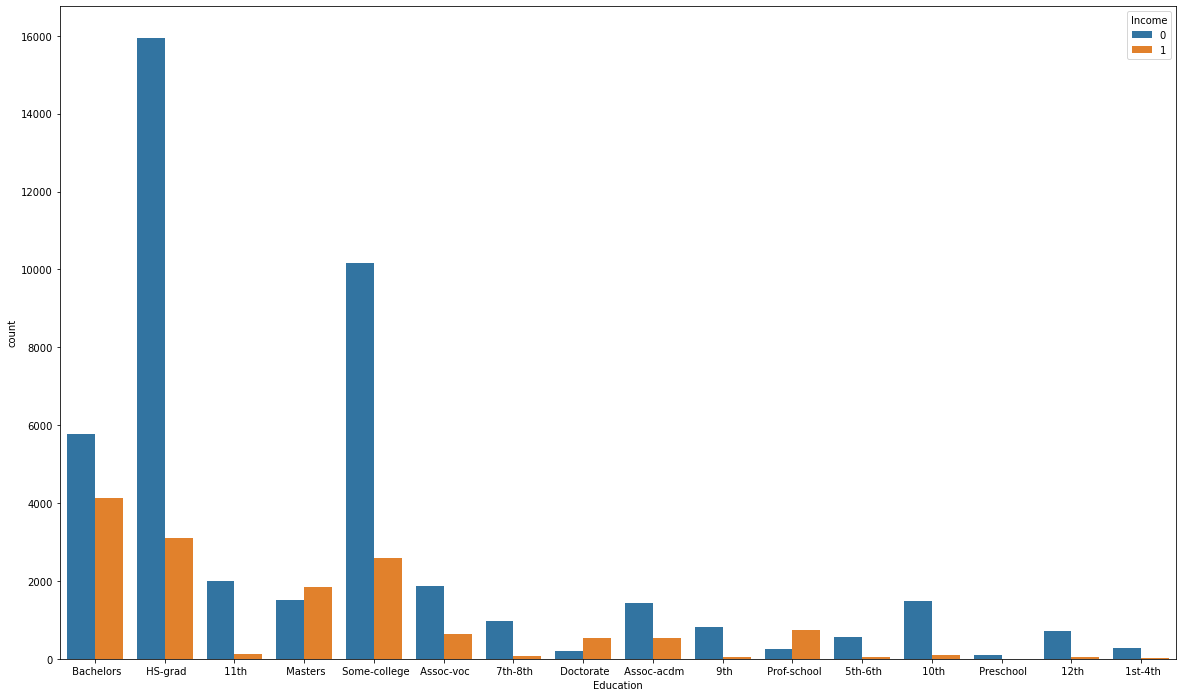

In [24]:
sns.countplot(x = 'Education', hue = 'Income', data = data)

In [25]:
# drop duplicate feature data 
data.drop(['Education Number'], axis = 1, inplace = True)
data['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
data['Education'].value_counts()

 HS-grad         19068
 Some-college    12758
 Bachelors        9904
 School           7396
 Masters          3350
 Assoc-voc        2501
 Assoc-acdm       1951
 Prof-school       996
 Doctorate         724
Name: Education, dtype: int64

In [26]:
data['Marital Status'].value_counts()

 Married-civ-spouse       27354
 Never-married            18948
 Divorced                  8098
 Separated                 1799
 Widowed                   1662
 Married-spouse-absent      744
 Married-AF-spouse           43
Name: Marital Status, dtype: int64

In [27]:
data['Relationship'].value_counts()

 Husband           24222
 Not-in-family     15233
 Own-child          8482
 Unmarried          6155
 Wife               2743
 Other-relative     1813
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

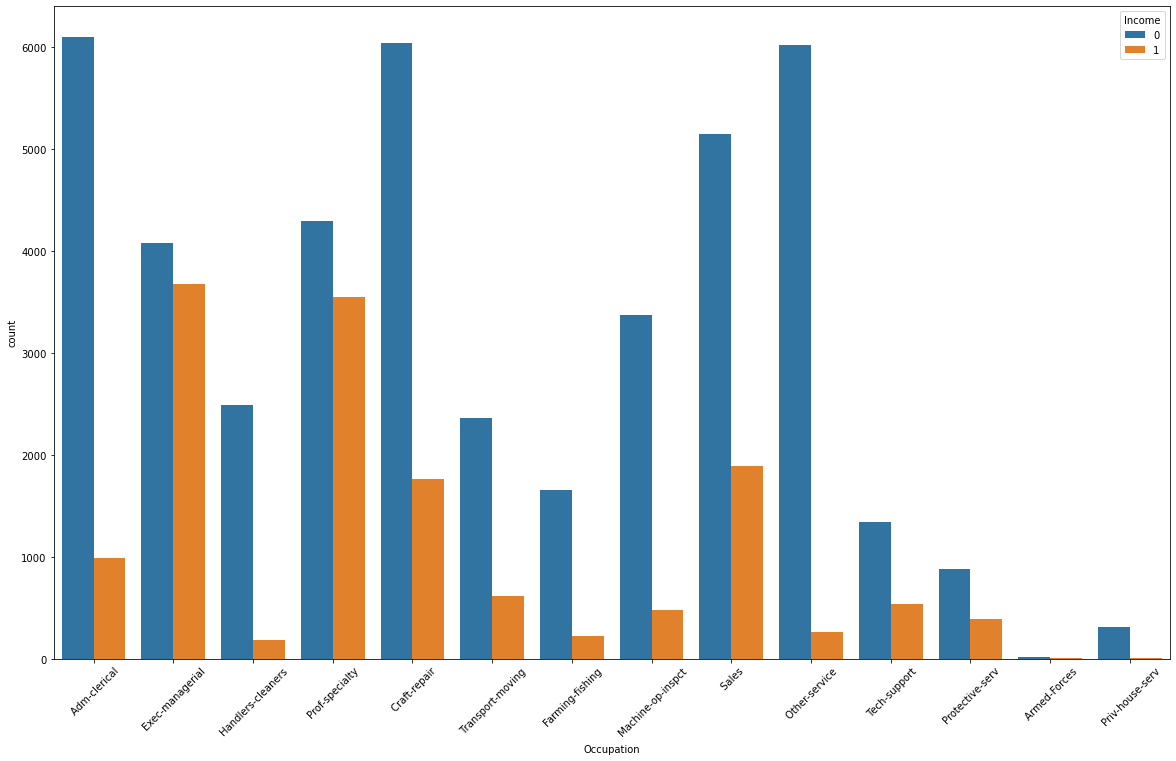

In [28]:
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = data)

<AxesSubplot:xlabel='Race', ylabel='count'>

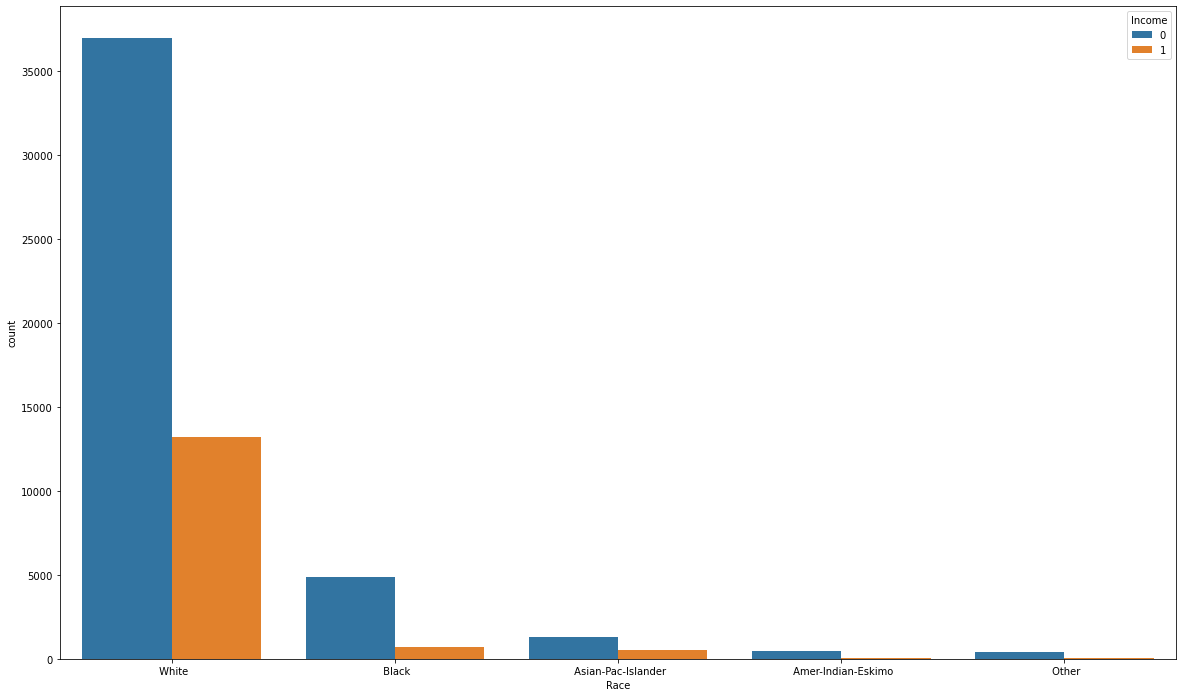

In [29]:
sns.countplot(x = 'Race', hue = 'Income', data = data)

In [30]:
# sub-categorize the Race feature data
data['Race'].unique()
data['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

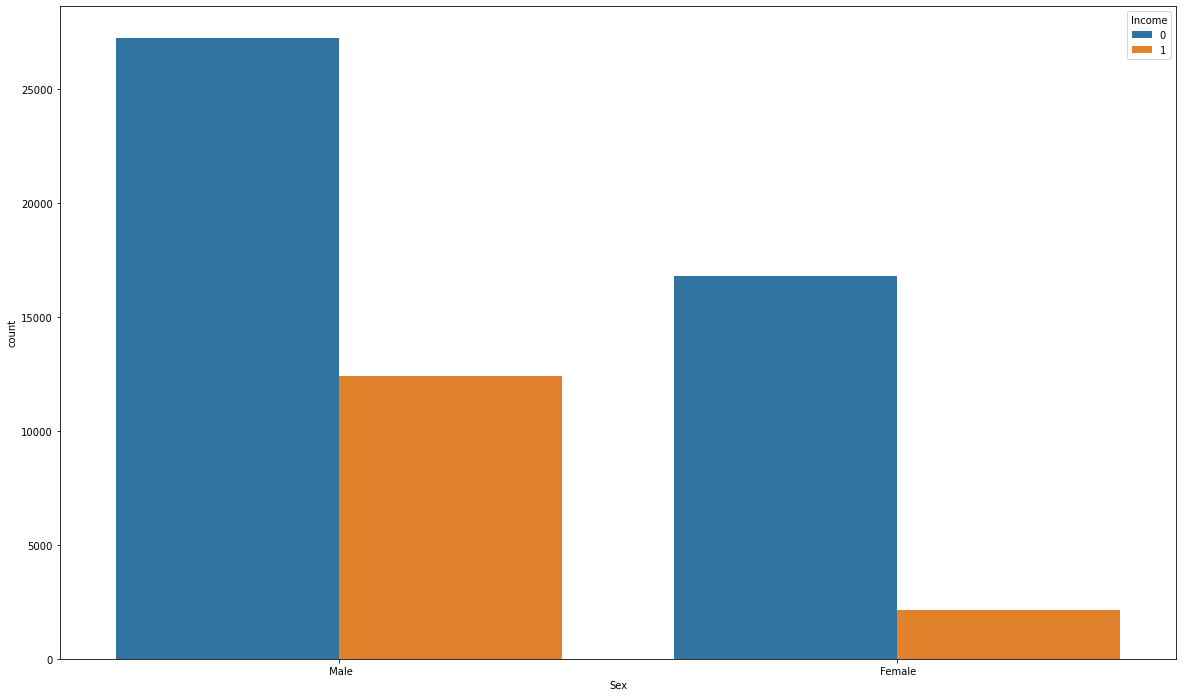

In [31]:
sns.countplot(x = 'Sex', hue = 'Income', data = data)

Text(0.5, 1.0, 'Total adults from each Country')

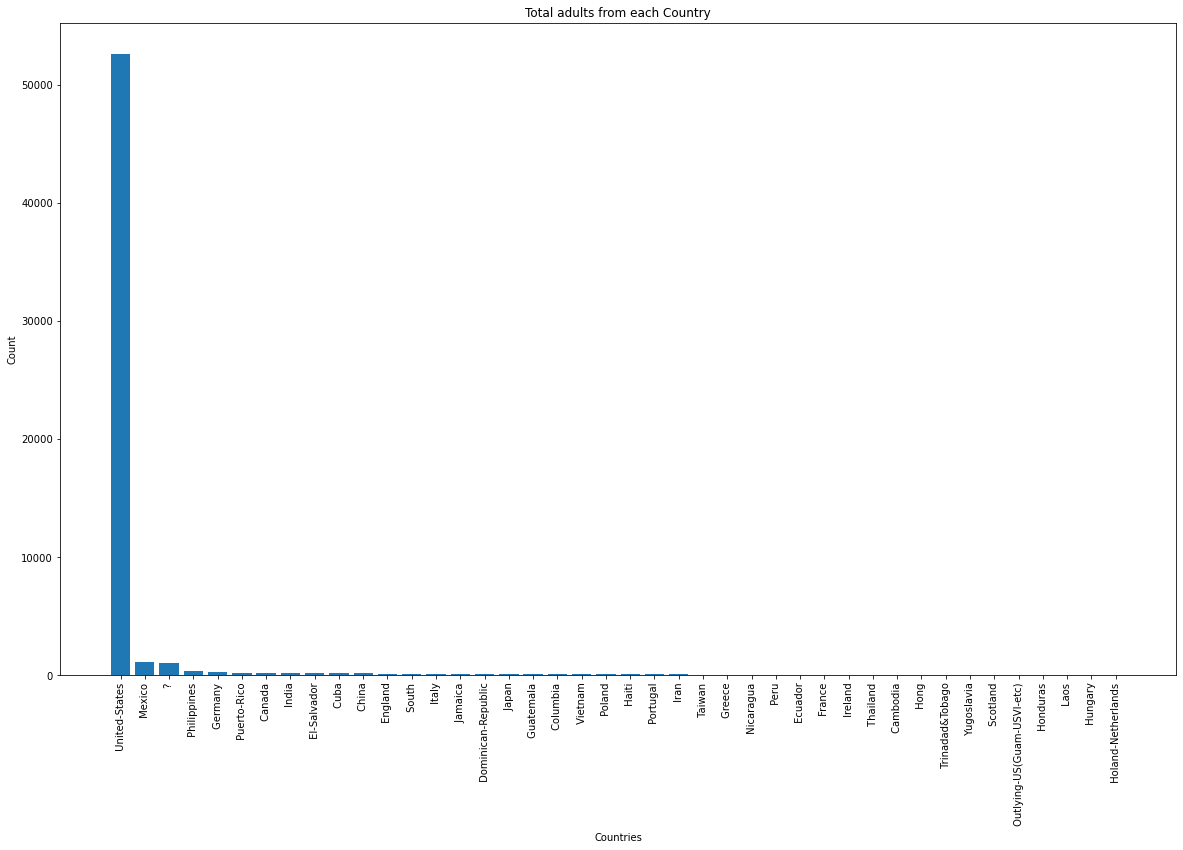

In [32]:
country_count = data['Country'].value_counts()
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

In [33]:
data = data.drop(data[data['Country'] == ' ?'].index)

<AxesSubplot:xlabel='count', ylabel='Country'>

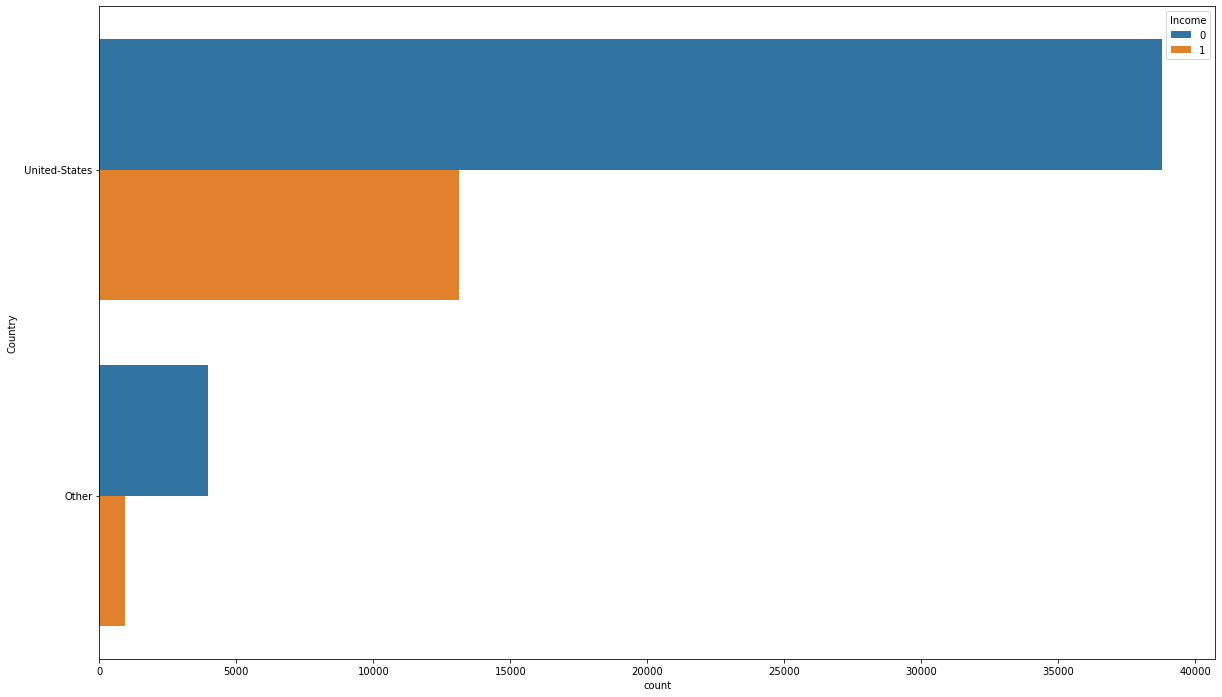

In [34]:
# sub-categorize the country feature data 
countries = np.array(data['Country'].unique())
countries = np.delete(countries, 0)
data['Country'].replace(countries, 'Other', inplace = True)
sns.countplot(y = 'Country', hue = 'Income', data = data)

In [35]:
y = data['Income']
X = data.drop(['Income'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 56


### 3.Data training - decision tree model & random forest model 

In [36]:
# after cleaning and categorizing data, split the cleaned dataset into 70% training dataset and 30% testing dataset 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [37]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
classifiers = [DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0)]
classifier_names = ["Decision Tree Classifier", "Random Forest Classifier"]
accuracies = []

In [39]:
# train data in the two madels 
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Decision Tree Classifier:
F1 score: 0.66
Random Forest Classifier:
F1 score: 0.68


### 4.Data verificating - Accuracy & ROC

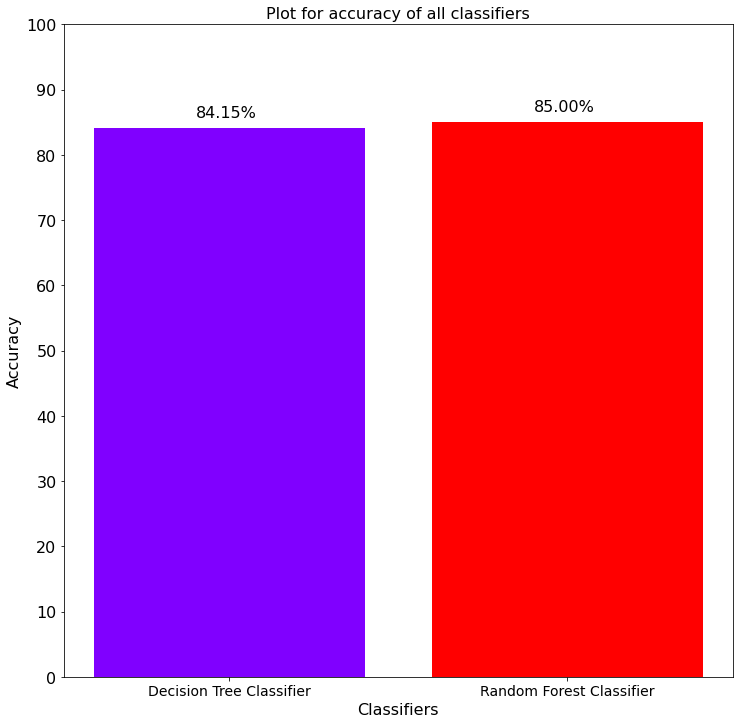

In [40]:
# visualize the accuracy rate for each training model 
from matplotlib.cm import rainbow

plt.figure(figsize = (12, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

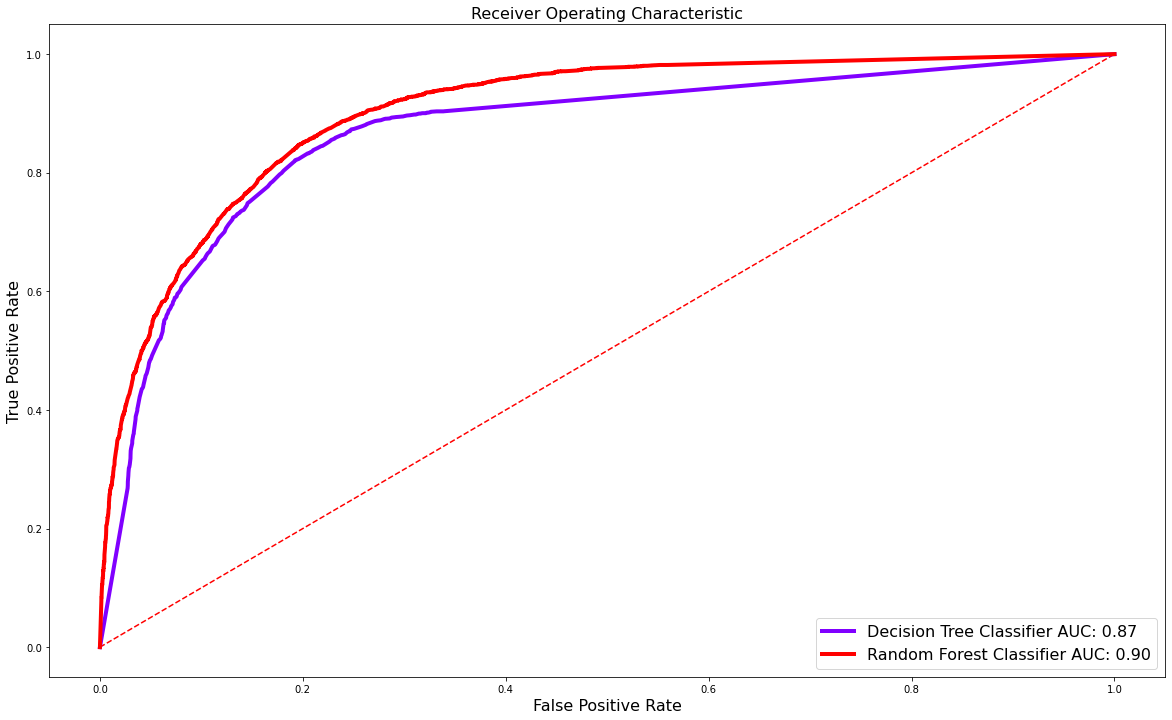

In [41]:
# Random forest classifier has a higher AUC of 0.90, meaning this training model is more fit fot this dataset 
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)